# Using Penguins to explore UMAP

In [1]:
import seaborn as sns
import pandas as pd
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.utils import shuffle
from sklearn.neighbors import NearestNeighbors

### Test if random shuffle affects UMAP content

Point 0 distances :
[100.45964364 150.18418692 250.47061704]
Point 1 distances :
[125.41786157 176.99152522 225.19256204]
Point 2 distances :
[50.1079834  51.21035052 51.36457924]
Point 3 distances :
[31.3287408  51.44803203 53.92643137]
Point 4 distances :
[14.67685252 25.36868148 50.1079834 ]
Point 5 distances :
[ 52.67295321 100.02459697 125.41786157]
Point 6 distances :
[ 50.2748446  400.04702224 450.15167444]
Point 7 distances :
[ 30.63135648  75.07129944 100.09860139]
Point 8 distances :
[28.77099234 50.88860383 76.41806069]
Point 9 distances :
[ 51.21035052 100.0248969  100.93428555]
Point 10 distances :
[ 52.67295321  52.86889445 125.62690795]
Point 11 distances :
[ 17.2956642   20.76174366 175.64481205]
Point 12 distances :
[ 75.17632606 125.62690795 175.02114158]
Point 13 distances :
[  9.76985159 100.33962328 100.84850024]
Point 14 distances :
[  4.07553677  17.2956642  175.02114158]
Point 15 distances :
[100.33962328 100.70357491 150.18418692]
Point 16 distances :
[100.4596

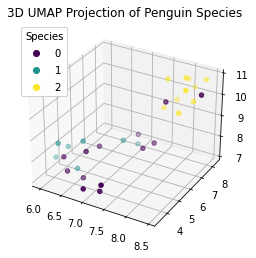

In [2]:
penguins = sns.load_dataset('penguins')
penguins.dropna(inplace=True)

random_state = 42
penguins = penguins.sample(n=30, random_state=random_state)

# Select numerical features from the dataset for UMAP
features = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
species = penguins['species']

# Encode categorical data
species_encoded = pd.Categorical(species).codes

neighbors = NearestNeighbors(n_neighbors=4)  # we use 4 because it includes the point itself
neighbors.fit(features)

# Find the distances and indices of the 3 closest neighbors for each point
distances_1, indices = neighbors.kneighbors(features)

# Printing the distances to the 3 closest neighbors (excluding the point itself)
for i in range(len(distances_1)):
    print(f"Point {i} distances :")
    print(distances_1[i][1:])  # exclude the first distance, which is to itself (distance = 0)

# Initialize UMAP
reducer = umap.UMAP(n_components=3, random_state=random_state)
embedding = reducer.fit_transform(features)

# Initialize UMAP
reducer = umap.UMAP(n_components=3, random_state=42)
embedding = reducer.fit_transform(features)

# Plotting the 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=species_encoded, cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(), title="Species")
ax.add_artist(legend1)
ax.set_title('3D UMAP Projection of Penguin Species')
plt.show()

Point 0 distances :
[ 52.86889445  75.17632606 100.02459697]
Point 1 distances :
[225.19256204 350.00178571 400.30679485]
Point 2 distances :
[50.1079834  51.21035052 51.36457924]
Point 3 distances :
[31.3287408  51.44803203 53.92643137]
Point 4 distances :
[  9.76985159 100.09860139 100.70357491]
Point 5 distances :
[ 50.2748446  400.04702224 450.15167444]
Point 6 distances :
[25.36868148 27.20220579 75.01333215]
Point 7 distances :
[14.67685252 25.36868148 50.1079834 ]
Point 8 distances :
[ 17.2956642   20.76174366 175.64481205]
Point 9 distances :
[14.67685252 27.20220579 51.36457924]
Point 10 distances :
[31.3287408  31.71639954 76.41806069]
Point 11 distances :
[ 28.77099234  75.18803096 102.42406944]
Point 12 distances :
[  9.76985159 100.33962328 100.84850024]
Point 13 distances :
[100.45964364 150.18418692 250.47061704]
Point 14 distances :
[ 75.17632606 125.62690795 175.02114158]
Point 15 distances :
[30.63135648 53.92643137 77.39386281]
Point 16 distances :
[100.45964364 250.

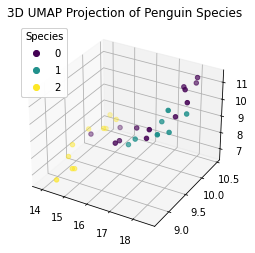

In [3]:
penguins = sns.load_dataset('penguins')
penguins.dropna(inplace=True)

random_state = 42
penguins = penguins.sample(n=30, random_state=random_state)

penguins = shuffle(penguins)

# Select numerical features from the dataset for UMAP
features = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
species = penguins['species']

# Encode categorical data
species_encoded = pd.Categorical(species).codes

neighbors = NearestNeighbors(n_neighbors=4)  # we use 4 because it includes the point itself
neighbors.fit(features)

# Find the distances and indices of the 3 closest neighbors for each point
distances_2, indices = neighbors.kneighbors(features)

# Printing the distances to the 3 closest neighbors (excluding the point itself)
for i in range(len(distances_2)):
    print(f"Point {i} distances :")
    print(distances_2[i][1:])  # exclude the first distance, which is to itself (distance = 0)

# Initialize UMAP
reducer = umap.UMAP(n_components=3, random_state=42)
embedding = reducer.fit_transform(features)

# Plotting the 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=species_encoded, cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(), title="Species")
ax.add_artist(legend1)
ax.set_title('3D UMAP Projection of Penguin Species')
plt.show()

In [4]:
sorted_distances_1 = [sorted(d) for d in distances_1]
sorted_distances_2 = [sorted(d) for d in distances_2]

print(sorted_distances_1)
print(sorted_distances_2)

[[0.0, 100.45964363862734, 150.18418691726504, 250.47061703920483], [0.0, 125.41786156684381, 176.99152522084214, 225.19256204413148], [0.0, 50.10798339586218, 51.210350516277465, 51.36457923511104], [0.0, 31.328740798187212, 51.448032032333366, 53.92643136718765], [0.0, 14.676852523616908, 25.368681479335894, 50.10798339586218], [0.0, 52.67295321130191, 100.02459697494412, 125.41786156684381], [0.0, 50.274844604434136, 400.0470222361366, 450.1516744387385], [0.0, 30.63135648318566, 75.07129944259657, 100.0986013888306], [0.0, 28.77099233603179, 50.888603832292354, 76.4180606924829], [0.0, 51.210350516277465, 100.02489690072167, 100.93428555253165], [0.0, 52.67295321130191, 52.86889444654579, 125.62690794571043], [0.0, 17.29566419655516, 20.761743664731053, 175.64481204977275], [0.0, 75.17632606080188, 125.62690794571043, 175.02114158009599], [0.0, 9.769851585361984, 100.33962328013794, 100.84850023674124], [0.0, 4.075536774462967, 17.29566419655516, 175.02114158009599], [0.0, 100.3396

In [5]:
matches = [s1 in sorted_distances_2 for s1 in sorted_distances_1]

# Print results
for i, match in enumerate(matches):
    print(f"Point {i} match found: {match}")

Point 0 match found: True
Point 1 match found: True
Point 2 match found: True
Point 3 match found: True
Point 4 match found: True
Point 5 match found: True
Point 6 match found: True
Point 7 match found: True
Point 8 match found: True
Point 9 match found: True
Point 10 match found: True
Point 11 match found: True
Point 12 match found: True
Point 13 match found: True
Point 14 match found: True
Point 15 match found: True
Point 16 match found: True
Point 17 match found: True
Point 18 match found: True
Point 19 match found: True
Point 20 match found: True
Point 21 match found: True
Point 22 match found: True
Point 23 match found: True
Point 24 match found: True
Point 25 match found: True
Point 26 match found: True
Point 27 match found: True
Point 28 match found: True
Point 29 match found: True
